In [20]:
import numpy
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [21]:
df = pd.read_csv ('2021-2022 NBA Player Stats.csv', index_col=0, delimiter=';', encoding='latin-1')
print(df)

                Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
Rk                                                                    ...   
1     Precious Achiuwa   C   22  TOR  34  20  25.3  3.4   8.1  0.412  ...   
2         Steven Adams   C   28  MEM  44  43  25.7  2.6   4.9  0.521  ...   
3          Bam Adebayo   C   24  MIA  21  21  32.9  6.9  13.3  0.518  ...   
4         Santi Aldama  PF   21  MEM  25   0  10.5  1.4   3.8  0.372  ...   
5    LaMarcus Aldridge   C   36  BRK  32  10  23.1  5.9  10.3  0.574  ...   
..                 ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
586     Thaddeus Young  PF   33  SAS  24   0  13.9  2.7   4.8  0.560  ...   
587         Trae Young  PG   23  ATL  41  41  34.8  9.3  20.5  0.455  ...   
588     Omer Yurtseven   C   23  MIA  36  10  15.1  2.7   5.2  0.521  ...   
589        Cody Zeller   C   29  POR  27   0  13.1  1.9   3.3  0.567  ...   
590        Ivica Zubac   C   24  LAC  43  43  24.6  3.8   5.7  0.675  ...   

In [22]:
corrM = df.corr()
print(corrM)

           Age         G        GS        MP        FG       FGA       FG%  \
Age   1.000000  0.128341  0.131980  0.221233  0.165827  0.154383  0.092885   
G     0.128341  1.000000  0.646799  0.700717  0.609406  0.590730  0.299430   
GS    0.131980  0.646799  1.000000  0.806669  0.773122  0.750591  0.215088   
MP    0.221233  0.700717  0.806669  1.000000  0.889476  0.893356  0.272768   
FG    0.165827  0.609406  0.773122  0.889476  1.000000  0.971504  0.325402   
FGA   0.154383  0.590730  0.750591  0.893356  0.971504  1.000000  0.182327   
FG%   0.092885  0.299430  0.215088  0.272768  0.325402  0.182327  1.000000   
3P    0.182497  0.526833  0.563201  0.731145  0.693463  0.775834  0.052145   
3PA   0.158738  0.513162  0.562943  0.735600  0.697697  0.804997 -0.020798   
3P%   0.143108  0.407063  0.226017  0.419612  0.358251  0.371684  0.192307   
2P    0.122902  0.521443  0.711587  0.779258  0.937739  0.861892  0.388863   
2PA   0.117384  0.513454  0.713778  0.804143  0.944854  0.912708

<AxesSubplot:>

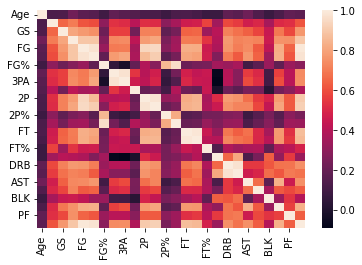

In [25]:
sns.heatmap(corrM)
##plt.show()